# Decision region plots demo (Fake Dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import patches as mpatches
from sklearn.svm import SVC

In [2]:
# create a fake classification dataset with 2 features and many samples
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_classes=3, 
                            class_sep=1, random_state=12, n_clusters_per_class=1)
# add a qualitative feature to the dataset
X = np.hstack((X, np.random.randint(0, 4, (X.shape[0], 1))))
print(X.shape, y.shape)

(1000, 3) (1000,)


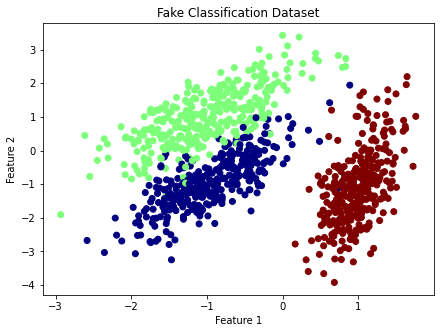

In [3]:
# create a scatter plot of the entire dataset
plt.figure(figsize=(7, 5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='jet')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fake Classification Dataset')
plt.show()

In [4]:
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# train a SVM classifier on the dataset
model = SVC(kernel='rbf', gamma=1, C=1)
model.fit(X_train, y_train)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 3) (300, 3) (700,) (300,)


In [5]:
# evaluate the classifier on the test set
y_pred = model.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
# create a confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                    index = ['Actual ' + str(int(i)) for i in np.unique(y)],
                    columns = ['Predicted ' + str(int(i)) for i in np.unique(y)])
print('Confusion Matrix:')
display(cm)

Accuracy: 0.97
Confusion Matrix:


,Predicted 0,Predicted 1,Predicted 2
Actual 0,84,4,3
Actual 1,3,97,0
Actual 2,0,0,109


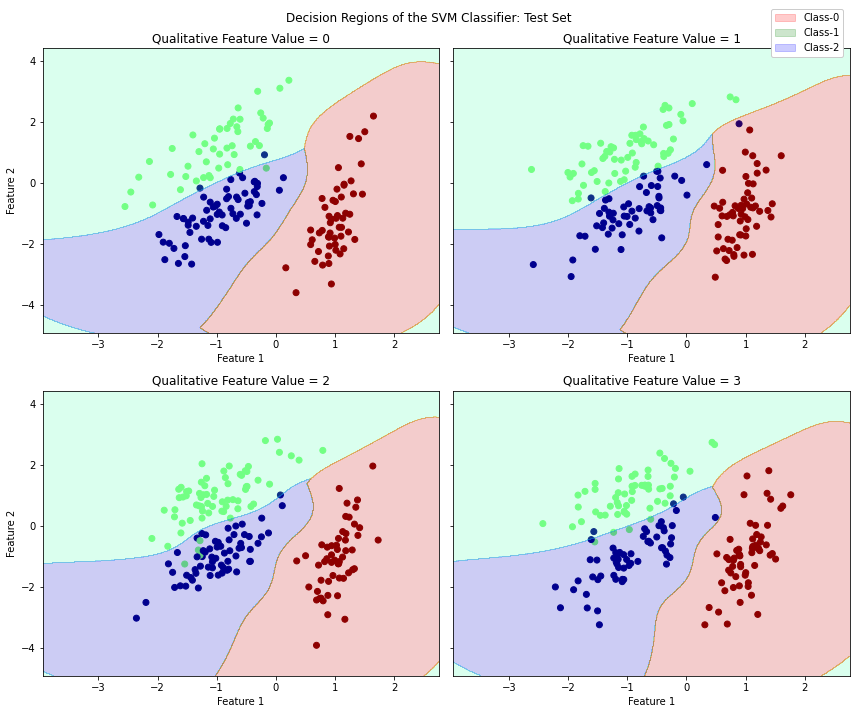

In [11]:
# plot the decision regions of the classifier
uniqueQualValues = [int(i) for i in np.unique(X[:,2])] # as list of integers
fig, ax = plt.subplots(2, len(uniqueQualValues)//2, figsize = (12, 10), sharey = True)
# create a meshgrid of the dataset
f1_min, f1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
f2_min, f2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, 0.01), np.arange(f2_min, f2_max, 0.01))
for i in uniqueQualValues:
    # predict the class of each point in the meshgrid
    Z = model.predict(np.c_[f1.ravel(), f2.ravel(), np.ones(f1.ravel().shape) * 1.0 * i])
    Z = Z.reshape(f1.shape)

    #ax[i//2,i%2].scatter(X_train[X_train[:,2]==i][:,0], X_train[X_train[:,2]==i][:,1], c=y_train[X_train[:,2]==i], cmap='jet') # plot the training set samples as a scatter plot
    ax[i//2,i%2].scatter(X_test[X_test[:,2]==i][:,0], X_test[X_test[:,2]==i][:,1], c=y_test[X_test[:,2]==i], cmap='jet') # plot the test set samples as a scatter plot
    
    ax[i//2,i%2].contourf(f1, f2, Z, alpha=0.2, cmap='jet') # plot the decision regions
    
    ax[i//2,i%2].set_xlabel('Feature 1')
    ax[i//2,0].set_ylabel('Feature 2')
    ax[i//2,i%2].set_title('Qualitative Feature Value = ' + str(i))

legend0 = mpatches.Patch(color = 'red', label = 'Class-0', alpha = 0.2)
legend1 = mpatches.Patch(color = 'green', label = 'Class-1', alpha = 0.2)
legend2 = mpatches.Patch(color = 'blue', label = 'Class-2', alpha = 0.2)
fig.legend(handles = [legend0, legend1, legend2],loc = (0.9,0.92), fontsize = 'medium',framealpha = 1)

plt.suptitle('Decision Regions of the SVM Classifier: Test Set')
plt.tight_layout()
plt.show()